## Decision Tree

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Split data into training and testing sets
#### 3. Run Decision Tree classifier
#### 4. Confusion matrix (Training data)
#### 5. Confusion matrix (Test data)

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Dataset-weather-prediction-dataset-processed_scaled.csv'), index_col = False)

In [4]:
climate.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101
1,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102
2,2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103
3,3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,19600104
4,4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,19600105


In [5]:
climate.shape

(22950, 170)

In [6]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [7]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
pleasantweather.shape

(22950, 16)

In [9]:
columns_to_drop = [col for col in climate.columns if any(city in col for city in ['GDANSK', 'ROMA', 'TOURS']) or col in ['Unnamed: 0', 'DATE']]

In [10]:
climate = climate.drop(columns=columns_to_drop)

In [11]:
climate.shape

(22950, 147)

## 2. Split data into training and testing sets

In [12]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate
y = pleasantweather.drop(['DATE'], axis=1)

In [13]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [14]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [16]:
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

## Run Decision Tree classifier

[Text(0.36833035831016764, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06431502535451734, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.01842928005707432, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.00804481678315894, 0.8653846153846154, 'x[78] <= 0.233\ngini = 0.00

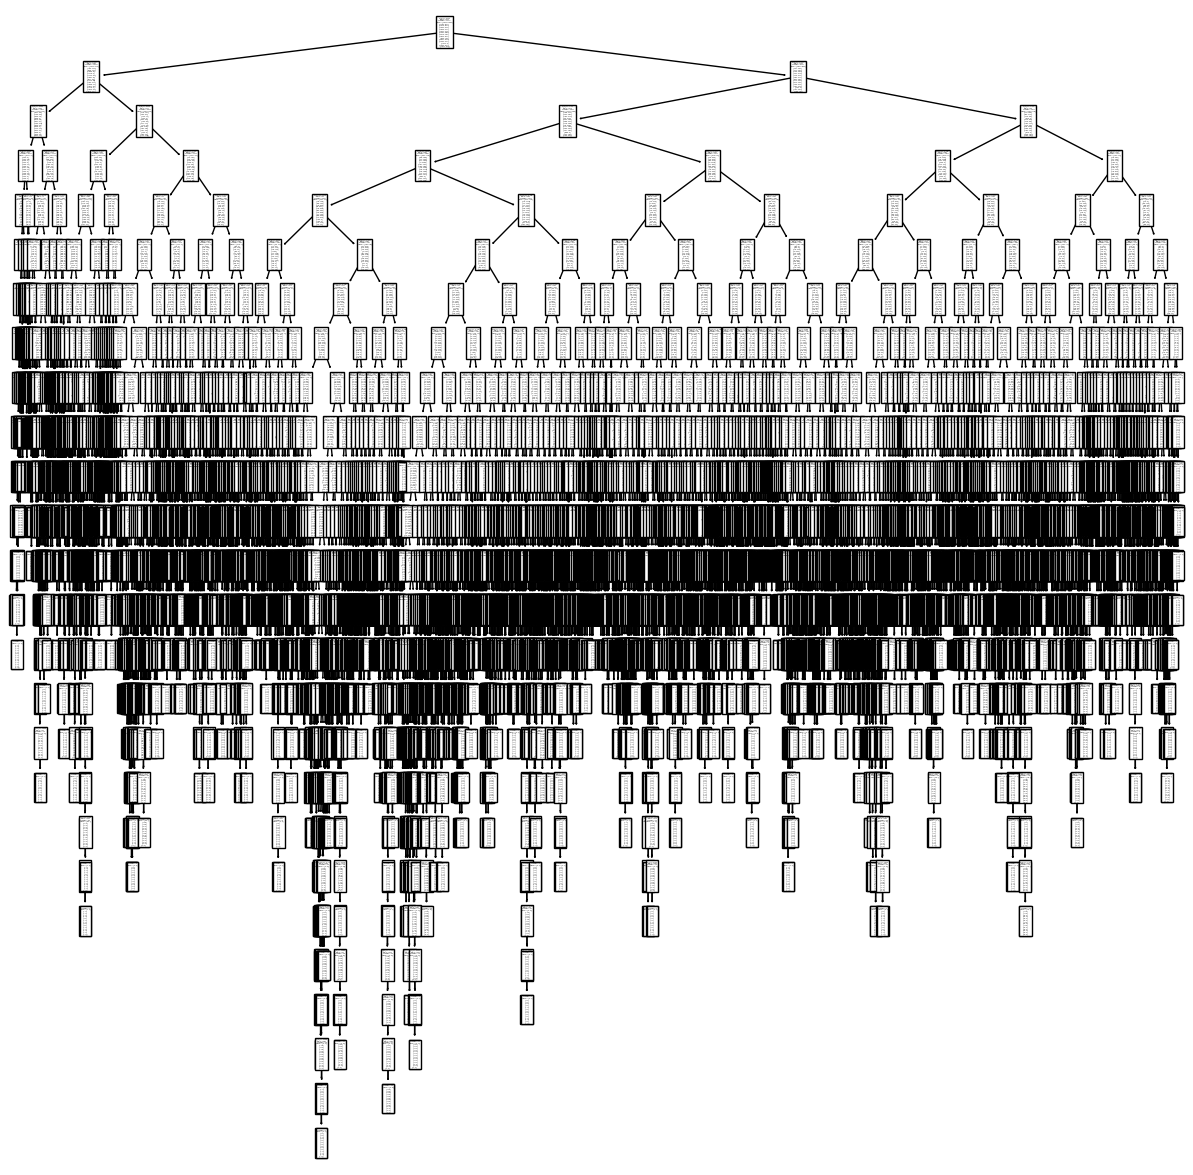

In [17]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [18]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6032417662968509


## Confusion matrix (Training data)

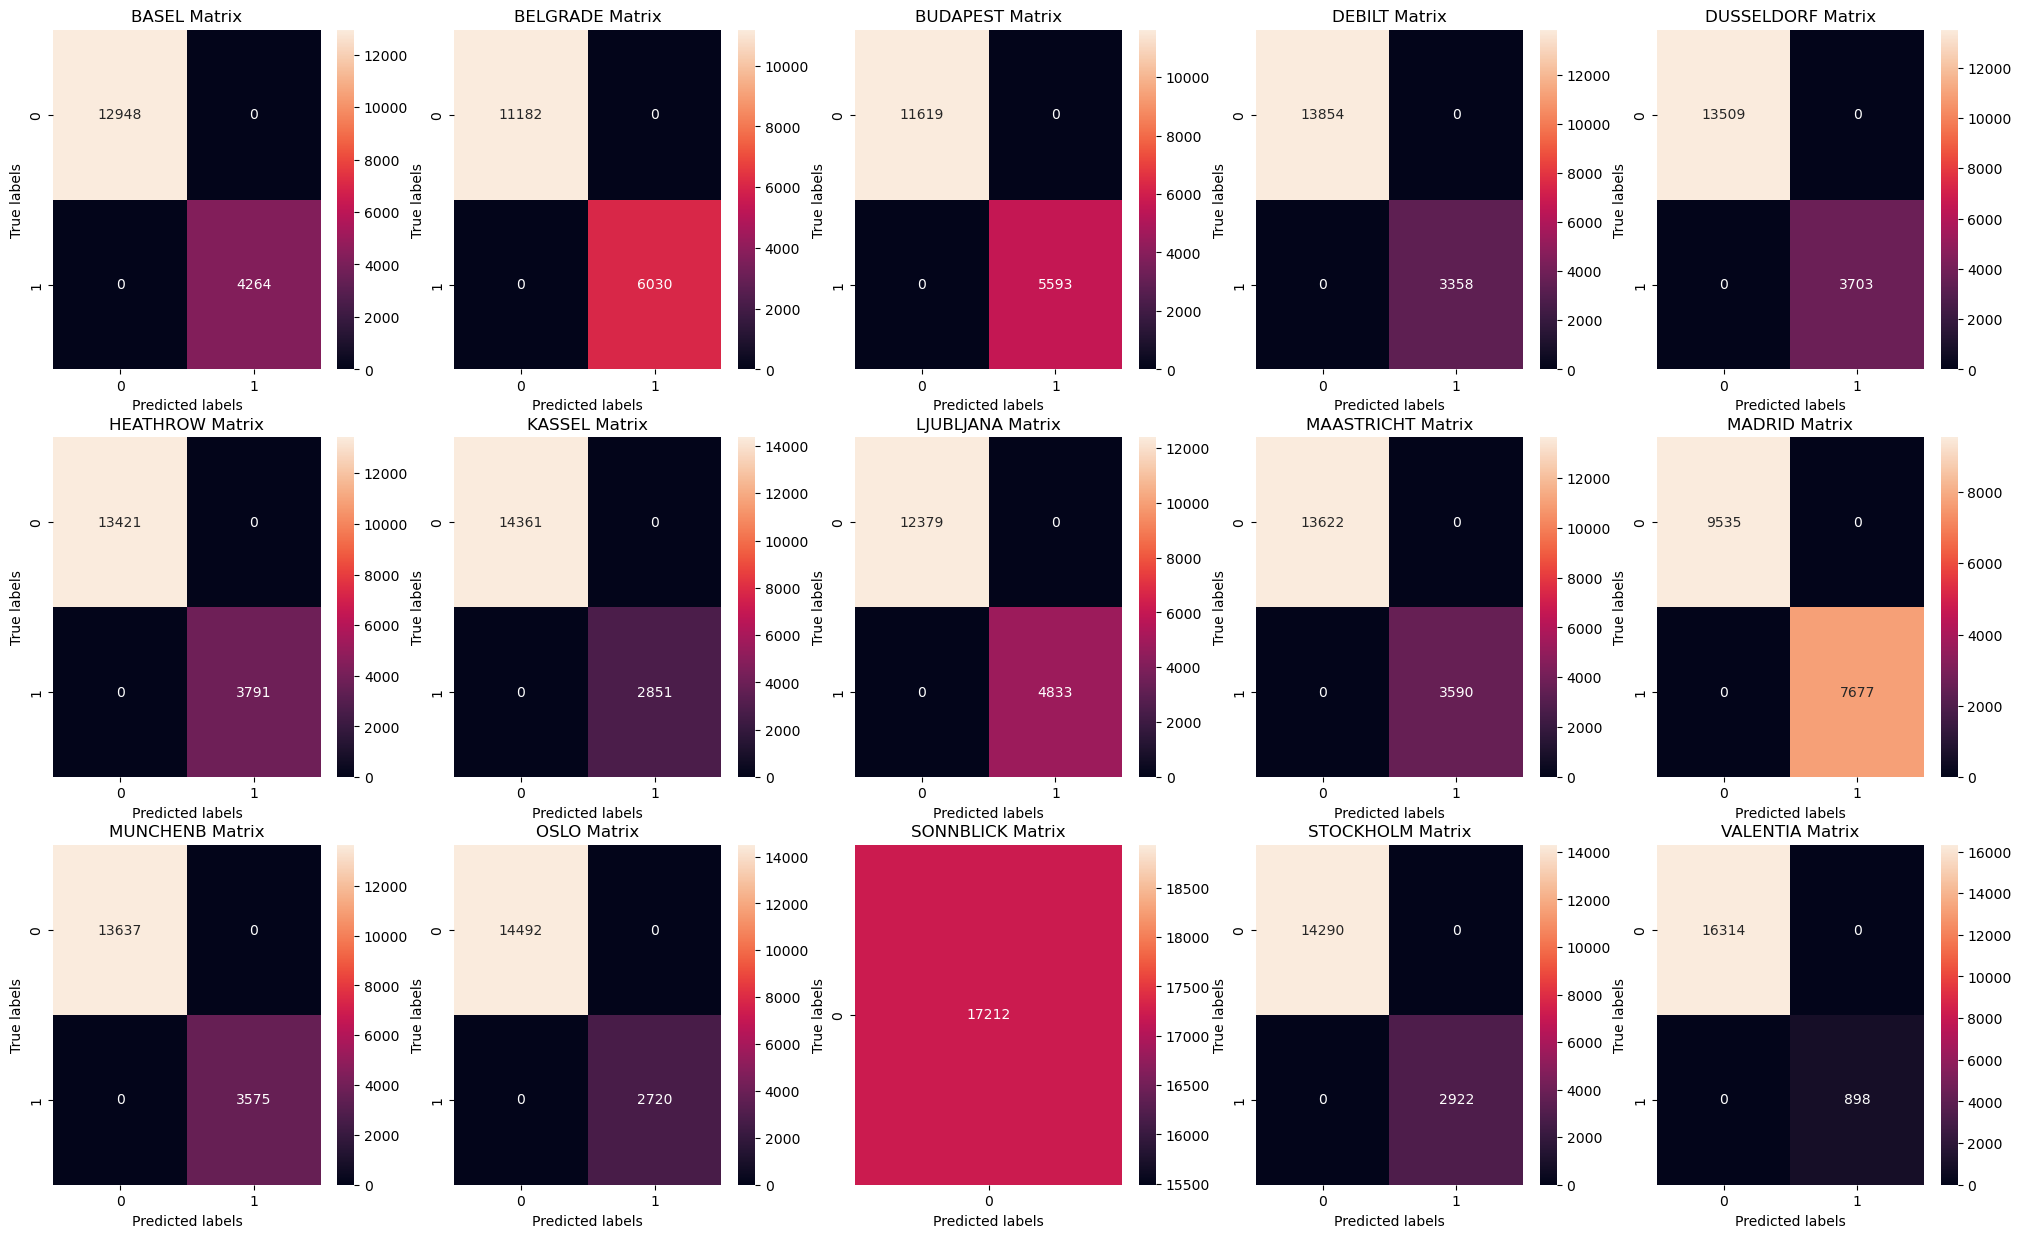

In [20]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## Confusion matrix (Test data)

In [21]:
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.6326246078773091


array([[[4154,  184],
        [ 139, 1261]],

       [[3645,  131],
        [ 115, 1847]],

       [[3744,  156],
        [ 148, 1690]],

       [[4412,  225],
        [ 191,  910]],

       [[4476,   31],
        [  38, 1193]],

       [[4280,  290],
        [ 244,  924]],

       [[4671,  144],
        [ 141,  782]],

       [[4139,   56],
        [  45, 1498]],

       [[4338,  224],
        [ 179,  997]],

       [[3009,  159],
        [ 153, 2417]],

       [[4392,  154],
        [ 167, 1025]],

       [[4714,  165],
        [ 135,  724]],

       [[5738,    0],
        [   0,    0]],

       [[4515,  251],
        [ 267,  705]],

       [[5292,  170],
        [ 175,  101]]])

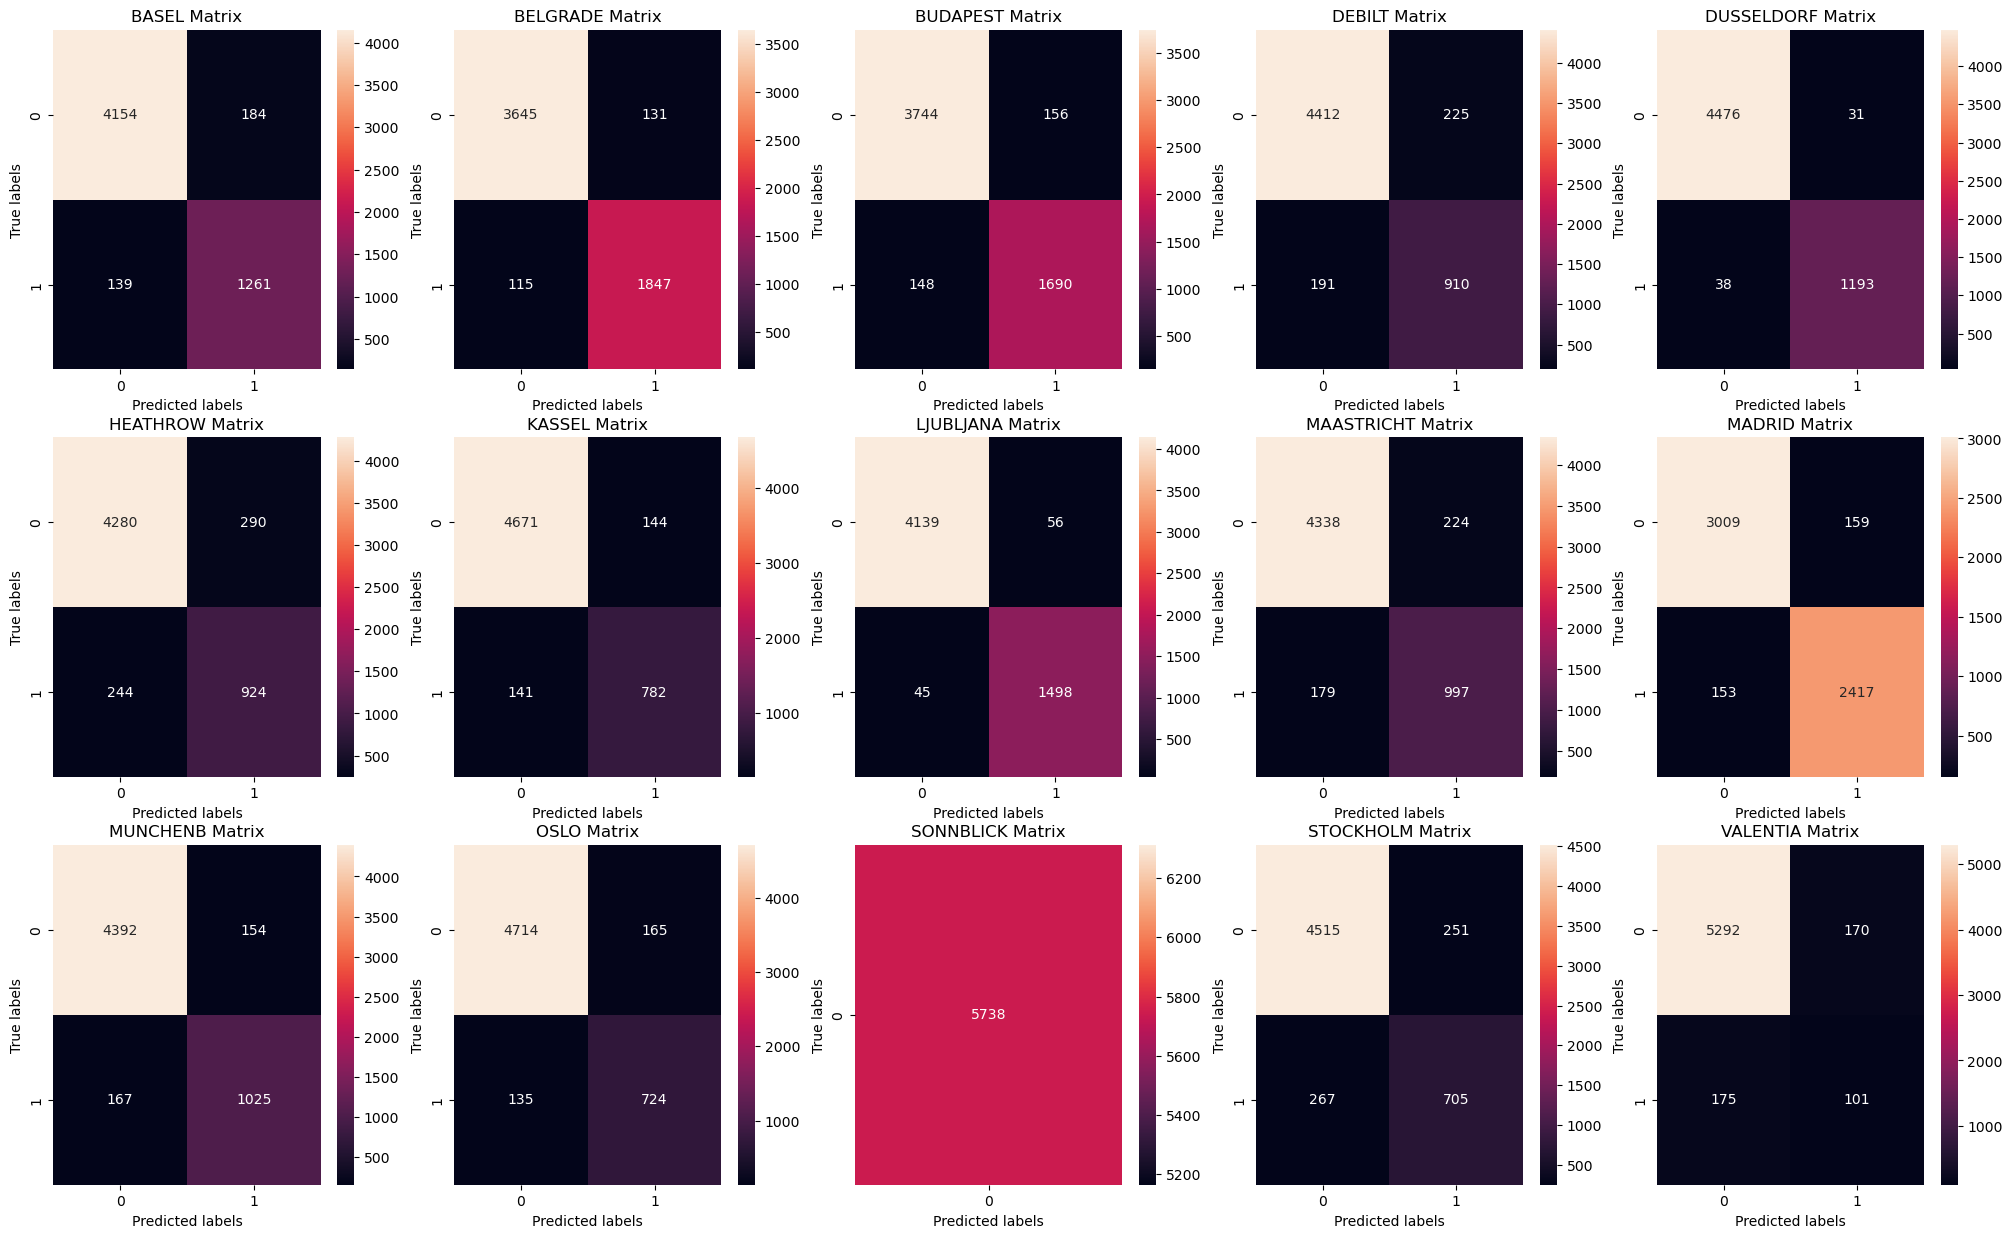

In [23]:
#Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1